In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install seaborn


   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   --------------------------------------- 294.6/294.6 kB 19.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
data=pd.read_csv("dataset - netflix1.csv")

In [6]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
data.info

<bound method DataFrame.info of      show_id     type                             title         director   
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson  \
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   

In [10]:
data.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [11]:
df=data.copy()
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [13]:
df['date'] = pd.to_datetime(df['date_added'], errors='coerce', format='%m/%d/%Y')

In [14]:
df.date.head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date, dtype: datetime64[ns]

In [15]:
df['year_added'] = df['date'].dt.year
df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: int32

In [16]:
df.shape

(8790, 12)

In [17]:
df=df[df['year_added'] >= df["release_year"]]
df.shape        

(8776, 12)

In [18]:
(df["year_added"] >= 2008).unique()

array([ True])

In [19]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,date,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,2021-09-25,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021-09-24,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021-09-22,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021-09-24,2021


([<matplotlib.patches.Wedge at 0x1b90984bd50>,
 [Text(-0.08427232777841072, -1.09676714701472, 'Movie'),
  Text(0.08427243046516165, 1.0967671391245704, 'Tv show')],
 [Text(-0.04596672424276948, -0.5982366256443926, '69.8%'),
  Text(0.04596678025372453, 0.5982366213406747, '30.2%')])

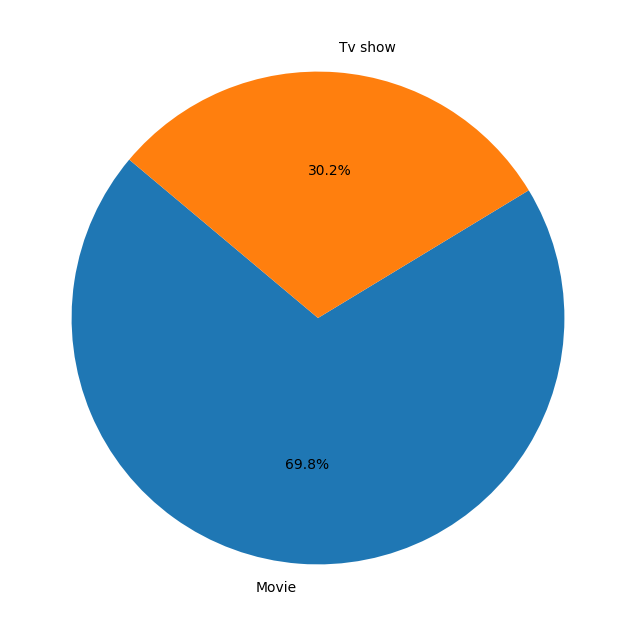

In [20]:
lable=[(df["type"]=="Movie").sum(),(df["type"]!="Movie").sum()]

plt.figure(figsize=(8, 8))
plt.pie(lable,labels=["Movie","Tv show"],autopct='%1.1f%%', startangle=140)


(array([1.000e+00, 8.000e+00, 7.000e+00, 2.100e+01, 2.700e+01, 9.900e+01,
        1.500e+02, 2.940e+02, 1.102e+03, 7.067e+03]),
 array([1925. , 1934.6, 1944.2, 1953.8, 1963.4, 1973. , 1982.6, 1992.2,
        2001.8, 2011.4, 2021. ]),
 <BarContainer object of 10 artists>)

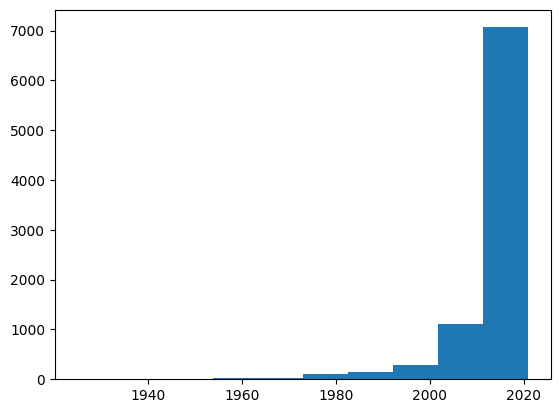

In [21]:
plt.hist(df["release_year"])

(array([4.000e+00, 1.000e+00, 1.300e+01, 1.300e+01, 2.400e+01, 8.200e+01,
        1.608e+03, 1.645e+03, 2.012e+03, 3.374e+03]),
 array([2008. , 2009.3, 2010.6, 2011.9, 2013.2, 2014.5, 2015.8, 2017.1,
        2018.4, 2019.7, 2021. ]),
 <BarContainer object of 10 artists>)

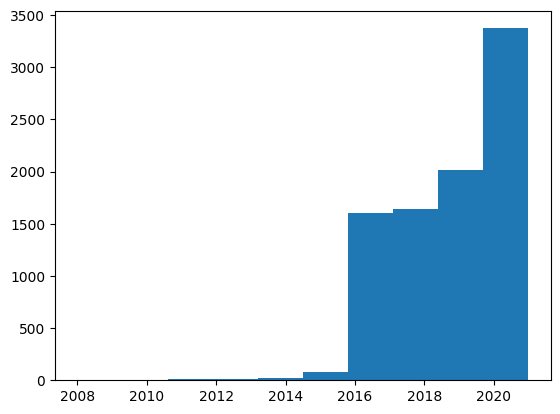

In [22]:
plt.hist(df["year_added"])

In [23]:
grouped = df.groupby(['country', 'type']).size().unstack(fill_value=0)
top_group=grouped.sort_values(by="Movie", ascending=False).head(10)
down_group=grouped.sort_values(by="Movie", ascending=False).tail(10)

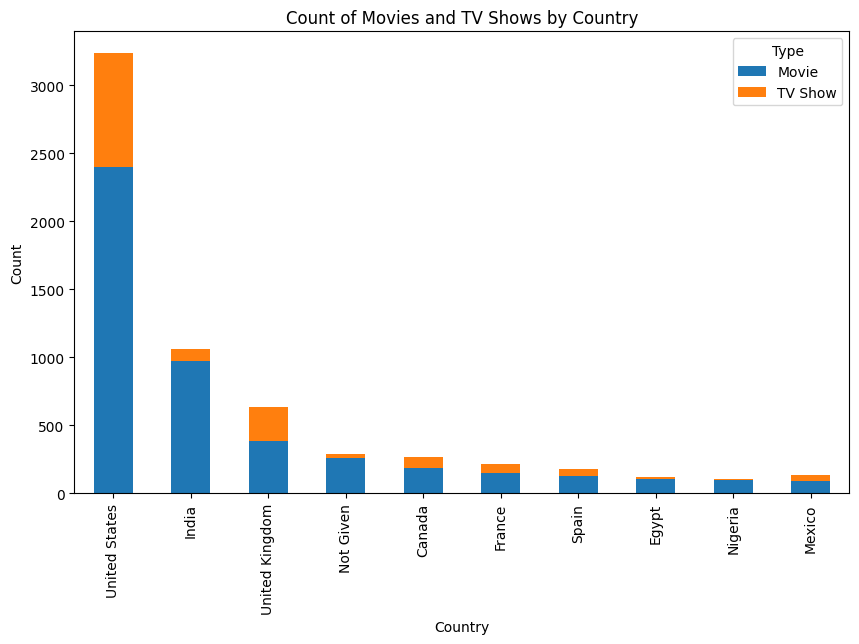

In [24]:
top_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows by Country')
plt.legend(title='Type')
plt.show()

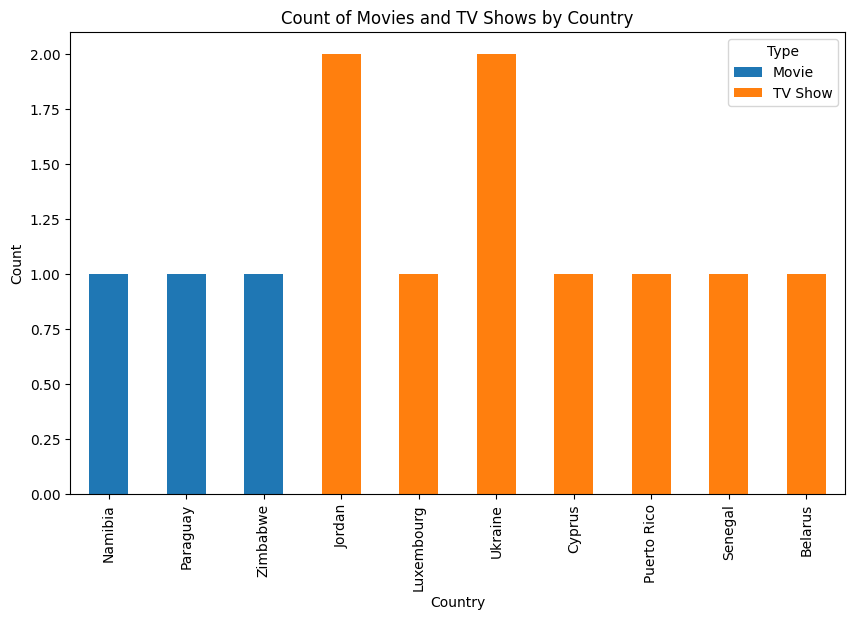

In [25]:
down_group.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows by Country')
plt.legend(title='Type')
plt.show()

In [26]:
dummies=pd.get_dummies(df['type']).head()
dummies

,Movie,TV Show
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False


In [27]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,date,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,2021-09-25,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021-09-24,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021-09-22,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021-09-24,2021


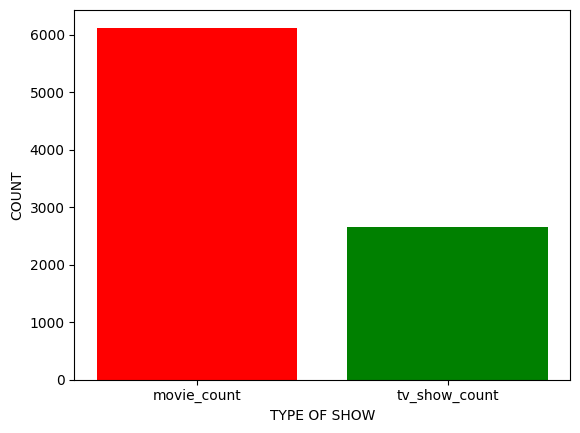

In [28]:
type=df.groupby('type').size()
movie_count=type[0]
tv_show_count=type[1]
count=[movie_count,tv_show_count]
variable=['movie_count','tv_show_count']
plt.bar(variable,count,color=['red','green'])
plt.xlabel("TYPE OF SHOW")
plt.ylabel("COUNT")
plt.show()

In [29]:
df.groupby('type').size()

type
Movie      6124
TV Show    2652
dtype: int64

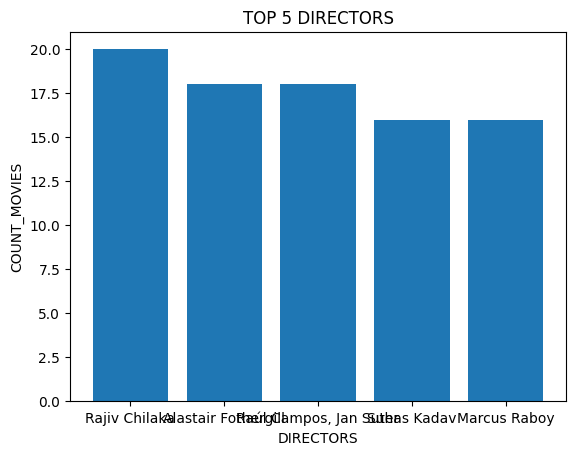

In [30]:

director_counts = df.groupby('director').size().reset_index(name='Movie_Count')
director_counts = director_counts.sort_values(by='Movie_Count', ascending=False)
director_counts=director_counts[director_counts["Movie_Count"] <= 20]
directors=director_counts['director'].head(5)
count_movies=director_counts['Movie_Count'].head(5)
plt.bar(directors,count_movies)
plt.xlabel("DIRECTORS")
plt.title("TOP 5 DIRECTORS")
plt.ylabel("COUNT_MOVIES")
plt.show()

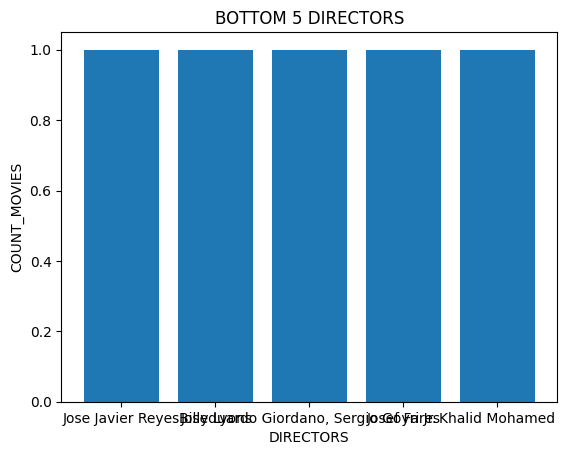

In [31]:
direc=director_counts['director'].tail(5)
cnt_movies=director_counts['Movie_Count'].tail(5)
plt.bar(direc,cnt_movies)
plt.xlabel("DIRECTORS")
plt.title("BOTTOM 5 DIRECTORS")
plt.ylabel("COUNT_MOVIES")
plt.show()

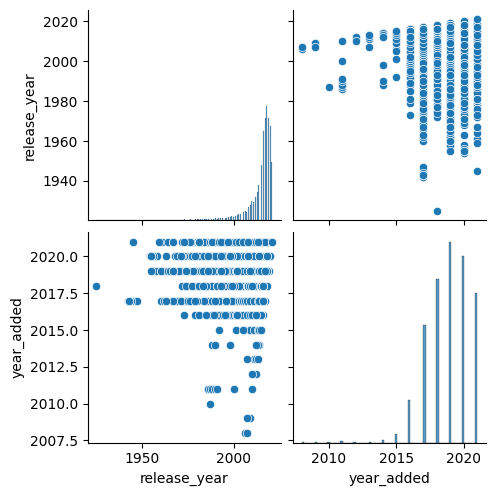

In [32]:
sns.pairplot(df)

In [ ]:
df